In [1]:
import qiskit
from qiskit import IBMQ
IBMQ.save_account('a4e6d63eee7508dc824b456663b480104911792aaf36de8c642552e3eabc9c0901560a2ad699612ccddfbc98d9be6ff0e65da61a46d92407873c09b90272966e')
provider = IBMQ.load_account() 


In [3]:
print("Available backends:")
backends = provider.backends()
print(backends)


Available backends:
[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [4]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
print(large_enough_devices)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())


[<IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]
The best backend is ibmq_16_melbourne


In [13]:
from qiskit.tools.monitor import job_monitor
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 1024
# Maximum number of credits to spend on executions.
max_credits = 3



In [14]:
import numpy as np
import math as m
import scipy as sci
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2)
c = ClassicalRegister(2)
circuito = QuantumCircuit(q,c)

circuito.x(q[0])
circuito.h(q[1])

circuito.measure(q,c)


In [15]:
job_exp = execute(circuito, backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)


Job Status: job has successfully run


toca esperar

In [16]:
result_exp = job_exp.result()


In [17]:
import matplotlib
%matplotlib inline

normal

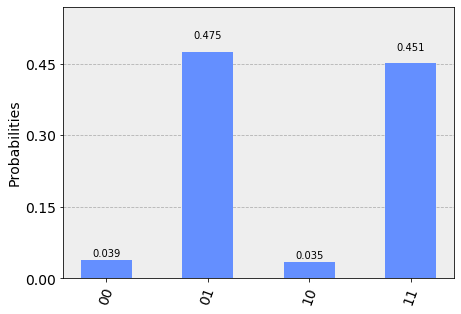

In [21]:
from qiskit.visualization import plot_histogram
 
counts_exp = result_exp.get_counts(circuito)
plot_histogram([counts_exp]) #podriamos meter más para pintar


In [25]:
from qiskit import BasicAer
M_simulator = BasicAer.get_backend('qasm_simulator') #Aer.backends(name='qasm_simulator')

q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
circuito2 = QuantumCircuit(q2,c2)

circuito2.x(q2[0])
circuito2.h(q2[1])

circuito2.measure(q2,c2)

job2 = execute(circuito2, M_simulator, shots=1024 )
result2 = job2.result()
counts2 = result2.get_counts(circuito2)

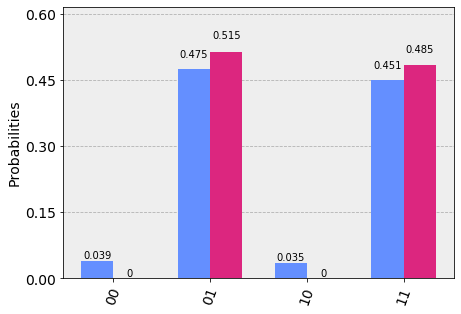

In [26]:
plot_histogram([counts_exp, counts2]) #podriamos meter más para pintar


retrive a running job:

In [27]:
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID)) #en lugar de job_monitor


JOB ID: 5d54443f235cfa00199c115a


In [28]:
job_get=backend.retrieve_job(jobID)


In [31]:
job_get.result().get_counts(circuito)


{'01': 486, '00': 40, '11': 462, '10': 36}